# K-Means Clustering of Customers

Here we will use unsupervised learning to cluster bank customers into one of n clusters. 
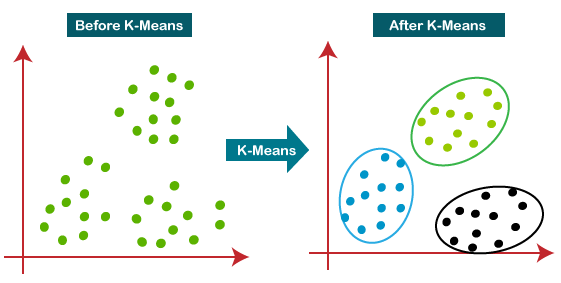
Image source: https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning




### <b>Please watch this video before starting this lab. https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer</b>


## Task: Define the following terms based on the video above:

- K (in the term K-means)  - K is the number of clusters found in the data.
- Cluster - a group of data points put that are grouped together because they are similar
- Elbow in the variance plot - the point in a variance plot where the y value amount increased per x value plummets
- Within Cluster Sum of Squares (WCSS)..you may have to research this a bit more - a measure of variability within clusters
- What is the difference between k-means clustering and hierarchical clustering? - k-means is used when the number of classes is fixed, while hierarchical clustering is used when classes are not fixed

### Import libraries

In [1]:
import sys
print(sys.executable)
import platform
print(platform.python_version())

c:\ProgramData\anaconda3\python.exe
3.11.4


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Exploratory Data Analysis

In [3]:
creditcard_df = pd.read_csv('Marketing_data.csv')

#### 1.1 Data distribution review

#### Column definition
  - Custid: Identification Of Credit Card Holder   
  - Balance: Balance Amount Left In Customer's Account To Make Purchases  
  - Balance_Frequency: How Frequently The Balance Is Updated, Score Between 0 And 1 (1 = Frequently Updated, 0 = Not Frequently Updated)  
  - Purchases: Amount Of Purchases Made From Account  
  - Oneoffpurchases: Maximum Purchase Amount Done In One-Go  
  - Installments_Purchases: Amount Of Purchase Done In Installment  
  - Cash_Advance: Cash In Advance Given By The User  
  - Purchases_Frequency: How Frequently The Purchases Are Being Made, Score Between 0 And 1 (1 = Frequently Purchased, 0 = Not Frequently Purchased)  
  - Oneoff_Purchases_Frequency: How Frequently Purchases Are Happening In One-Go (1 = Frequently Purchased, 0 = Not Frequently Purchased)  
  - Purchases_Installments_Frequency: How Frequently Purchases In Installments Are Being Done (1 = Frequently Done, 0 = Not Frequently Done)  
  - Cash_Advance_Frequency: How Frequently The Cash In Advance Being Paid  
  - Cash_Advance_Trx: Number Of Transactions Made With "Cash In Advance"  
  - Purchases_Trx: Number Of Purchase Transactions Made  
  - Credit_Limit: Limit Of Credit Card For User  
  - Payments: Amount Of Payment Done By User  
  - Minimum_Payments: Minimum Amount Of Payments Made By User    
  - Prc_Full_Payment: Percent Of Full Payment Paid By User  
  - Tenure: Tenure Of Credit Card Service For User  


In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Huge cash advance and purchase customers

In [6]:
creditcard_df[ creditcard_df['CASH_ADVANCE'] > 25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
1059,C11094,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.10915,1.000000,0.750000,1.000000,0.416667,26,61,15500.0,28150.97869,7321.639932,0.083333,12
2159,C12226,10905.053810,1.000000,431.93,133.50,298.43,47137.21176,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.59762,5394.173671,0.000000,12
7254,C17450,4530.205197,1.000000,1750.66,643.18,1107.48,26268.69989,1.000000,0.333333,1.000000,0.583333,10,36,8500.0,25203.91336,1366.869273,0.250000,12
7645,C17851,7081.171387,1.000000,0.00,0.00,0.00,26194.04954,0.000000,0.000000,0.000000,0.909091,69,0,9000.0,20191.30770,1926.017588,0.222222,11


In [7]:
creditcard_df[ creditcard_df['ONEOFF_PURCHASES'] > 25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1447,C11495,8151.985277,1.000000,25615.07,25122.77,492.30,0.000000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.20083,2465.465414,0.166667,12
1604,C11657,3391.702180,1.000000,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3937,C14048,2997.977825,1.000000,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.01496,11853.796130,0.750000,12


#### 1.2 Data quality review

In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Useful for quickly identifying columns that have missing data.

In [9]:
creditcard_df.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

How many values are missing in each column?

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### 1.3 Fill missing values

#### 1.3.1 Fill median for CREDIT_LIMIT

In [11]:
creditcard_df[creditcard_df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [12]:
creditcard_df['CREDIT_LIMIT'].median()

3000.0

In [13]:
creditcard_df.loc[ creditcard_df['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT' ] = creditcard_df['CREDIT_LIMIT'].median()

In [14]:
creditcard_df['CREDIT_LIMIT'].isnull().sum()

0

#### 1.3.2 Fill median for MINIMUM_PAYMENTS

In [15]:
creditcard_df[creditcard_df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [16]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()

In [17]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### 1.3.3 Look for duplicate rows

In [18]:
creditcard_df.duplicated().sum()

0

#### 1.4 Drop meaningless column

In [19]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [20]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

#### 1.5 Examine variable distribution

 - distplot combines matplotlib.hist function with seaborn kdeplot()  
 - KDE plot represents the Kernel Density Estimate  
 - KDE is used for visualizing the probability density of a continuous variable.  
 - KDE demonstrates the probability density at different values in a continous variable.  

#### Interesting findings: 

- For 'Balance', most customers are around 1500 
- For 'Balance Frequency', most customers are near 1, indicating they makes purchase frequently  
- For 'Purchases Fruqnecy', there are 2 distinct groups of customers, one purchases least often, the other frequently  
- For 'Prc_Full_payment', most customer pay 0 to 0.2 
- For 'Tenure', most customers are ~11 years tenure
- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
- Credit limit average is around $4500

C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\1137488856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\1137488856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\1137488856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\1137488856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

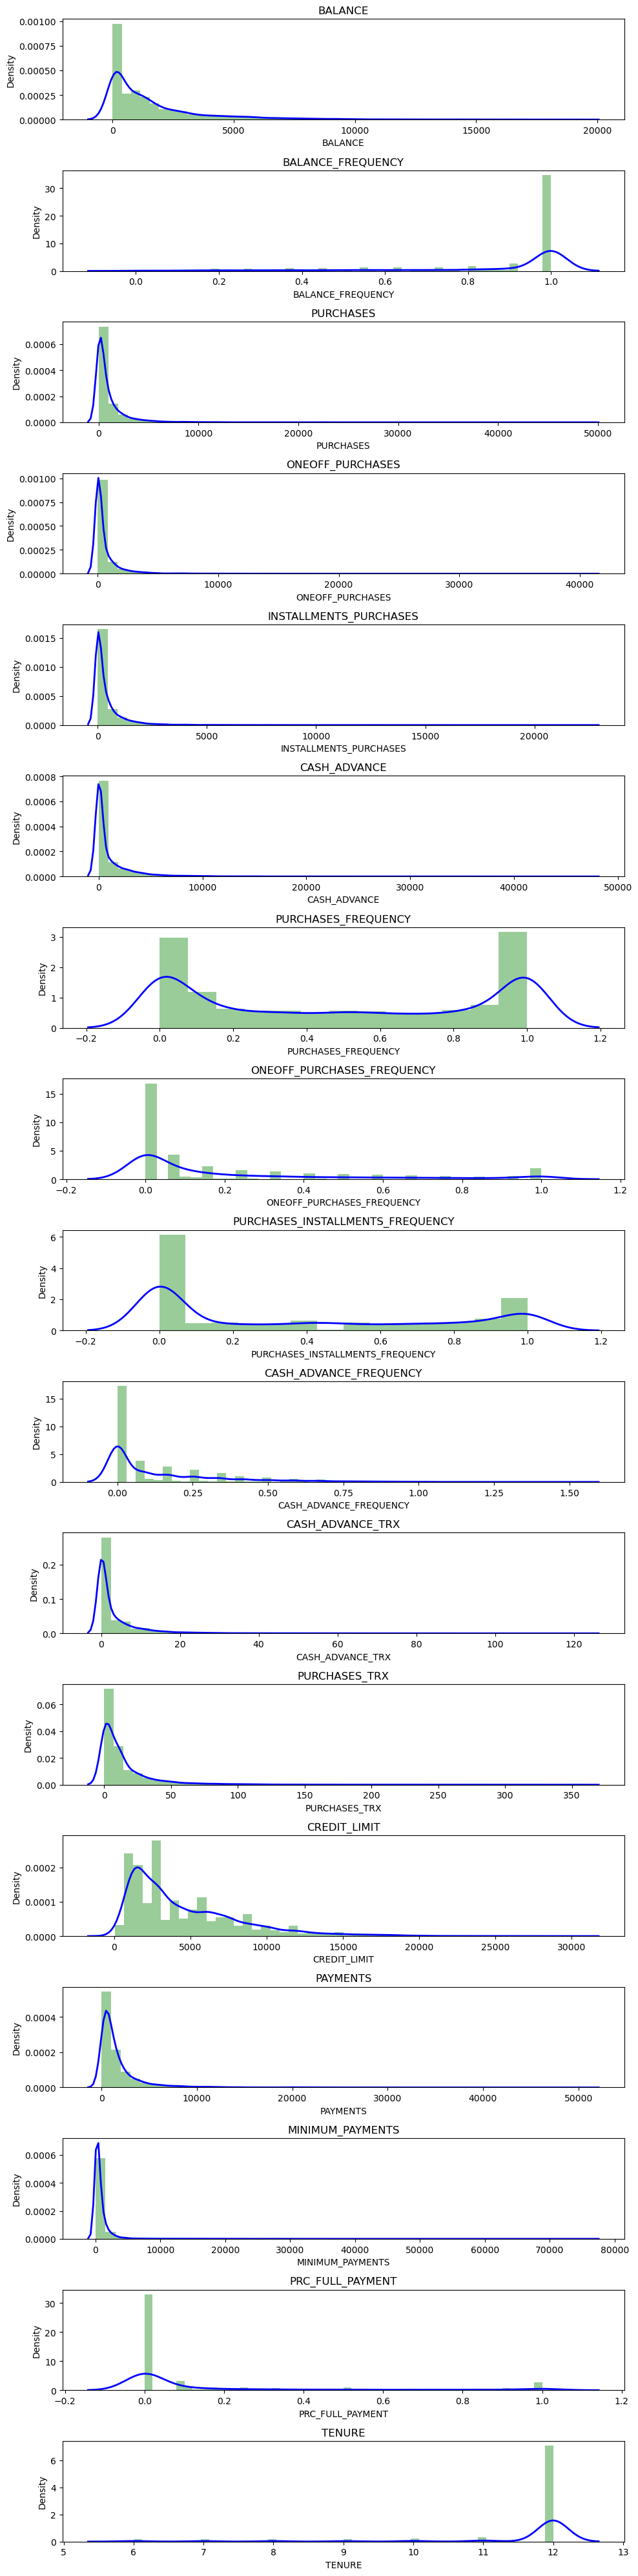

In [22]:
plt.figure(figsize = (10, 40))
for i in range(len(creditcard_df.columns)):
    ax = plt.subplot(17, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

#### 1.6 Correlation analysis

<Axes: >

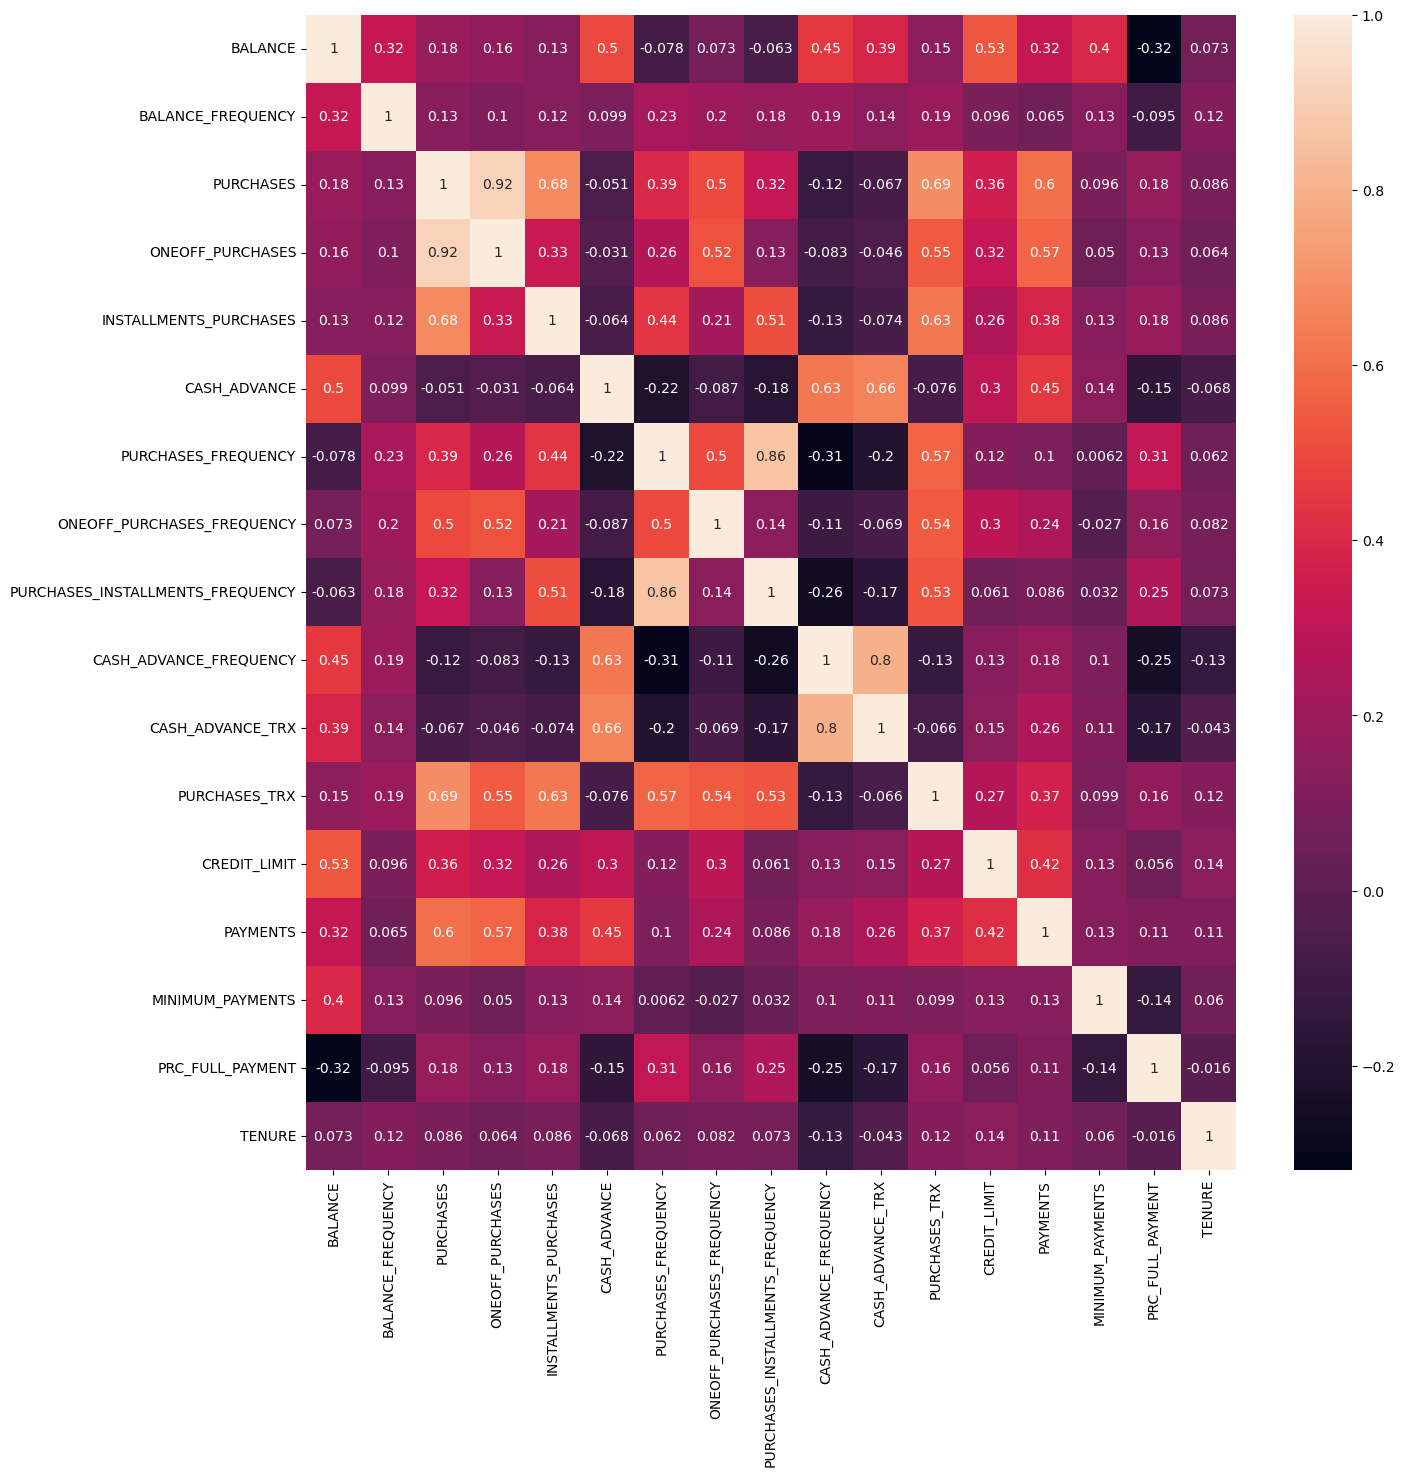

In [23]:
correlation = creditcard_df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation, annot = True)

### 2. K-means clustering

#### 2.1 Find the optimal number of clusters

In [24]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

To find the optimal value of clusters, the elbow method follows the below steps:

- It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
- For each value of K, calculates the WCSS value.
- Plots a curve between calculated WCSS values and the number of clusters K.
- The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

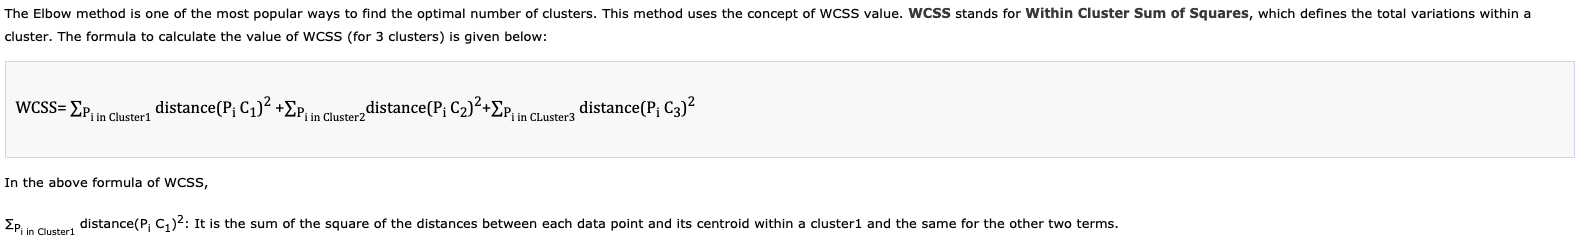

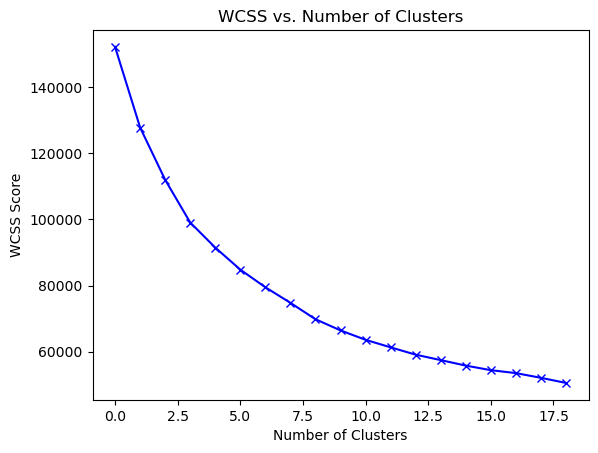

In [27]:
plt.plot(score_1, 'bx-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()

#### 2.2 Apply K-means with all features

In [28]:
#--k-means++ ensures not falling into random initialization trap
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(creditcard_df_scaled)

In [29]:
labels

array([1, 4, 3, ..., 6, 6, 6])

#### 2.3 Cluster feature visualization

In [30]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [31]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Ok, now let's see if we can make our computer catch on fire. It will create a histogram of each variable for each cluster.

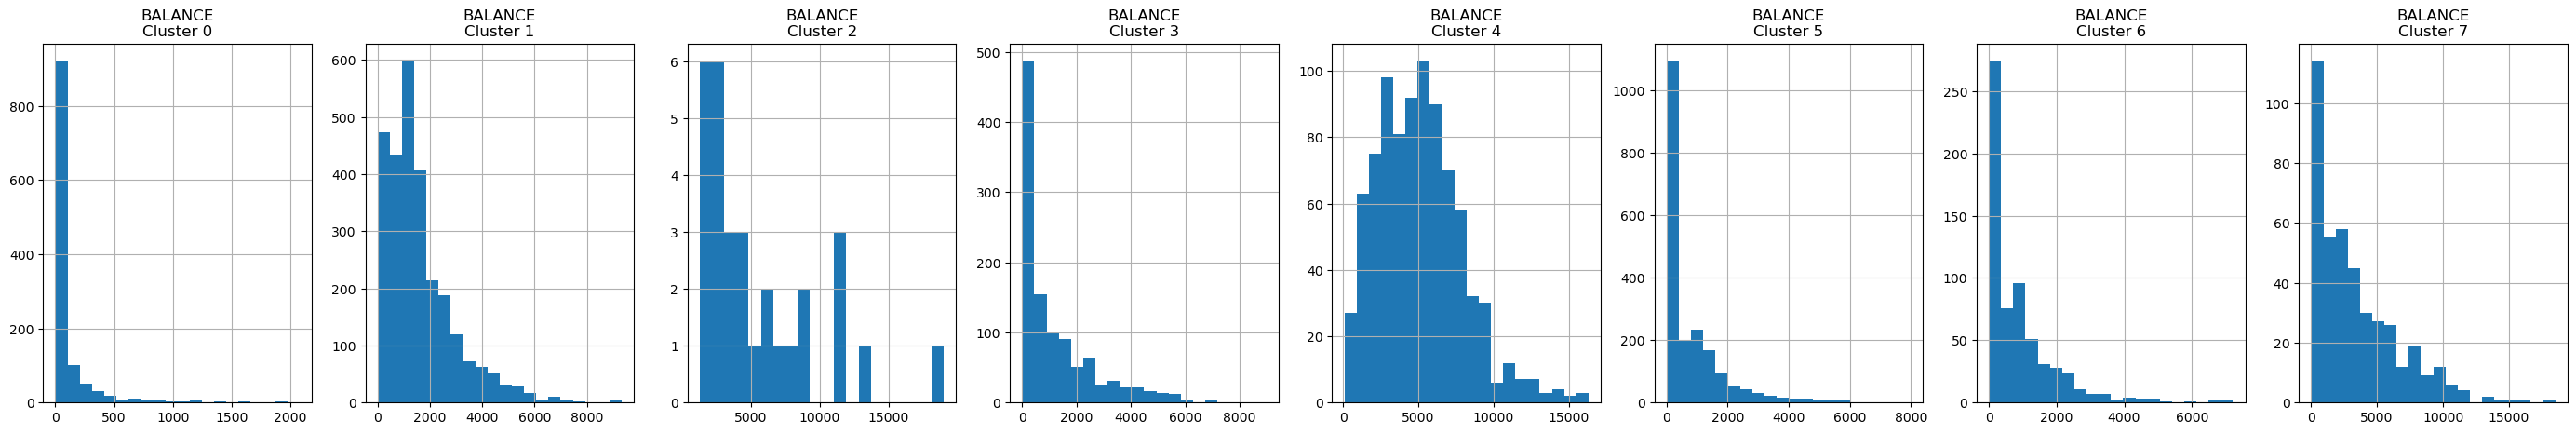

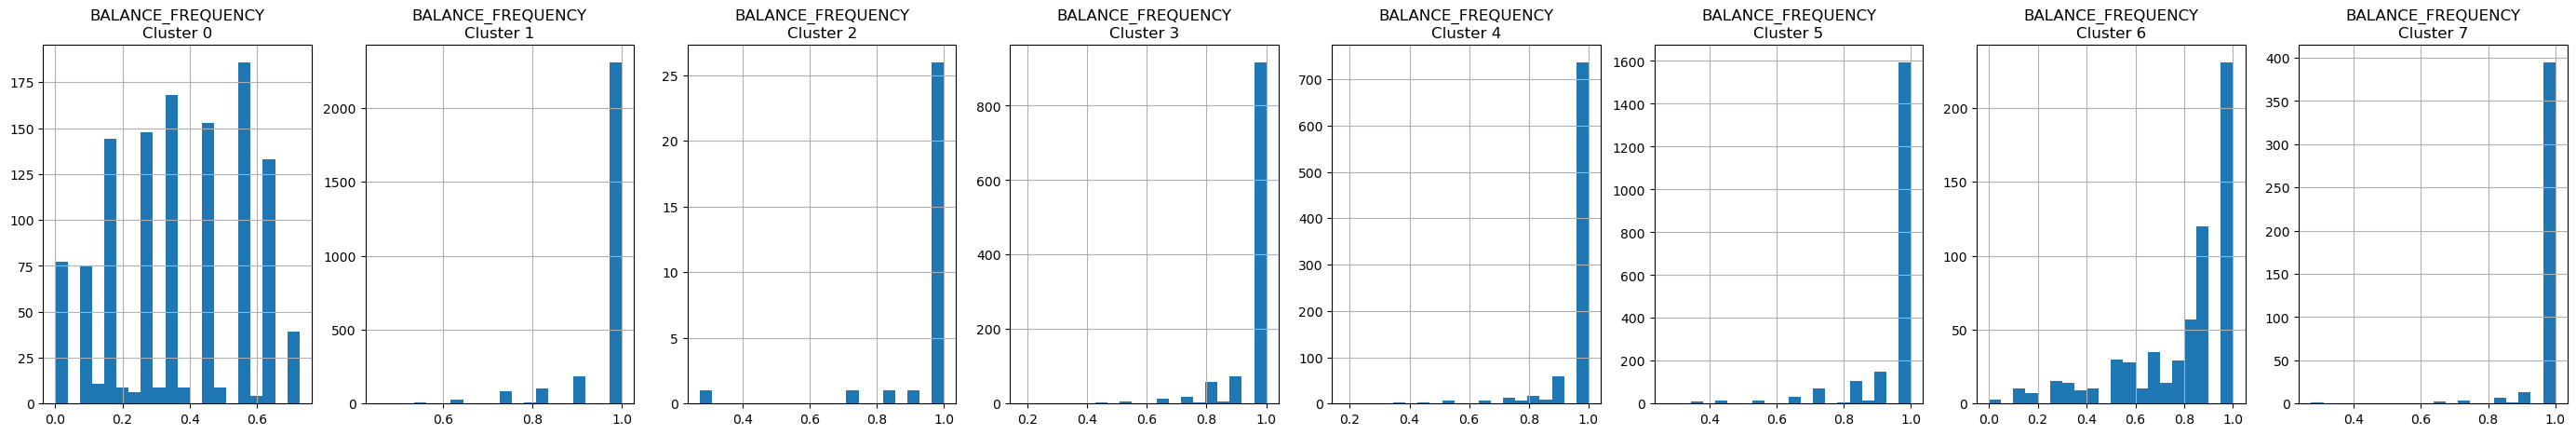

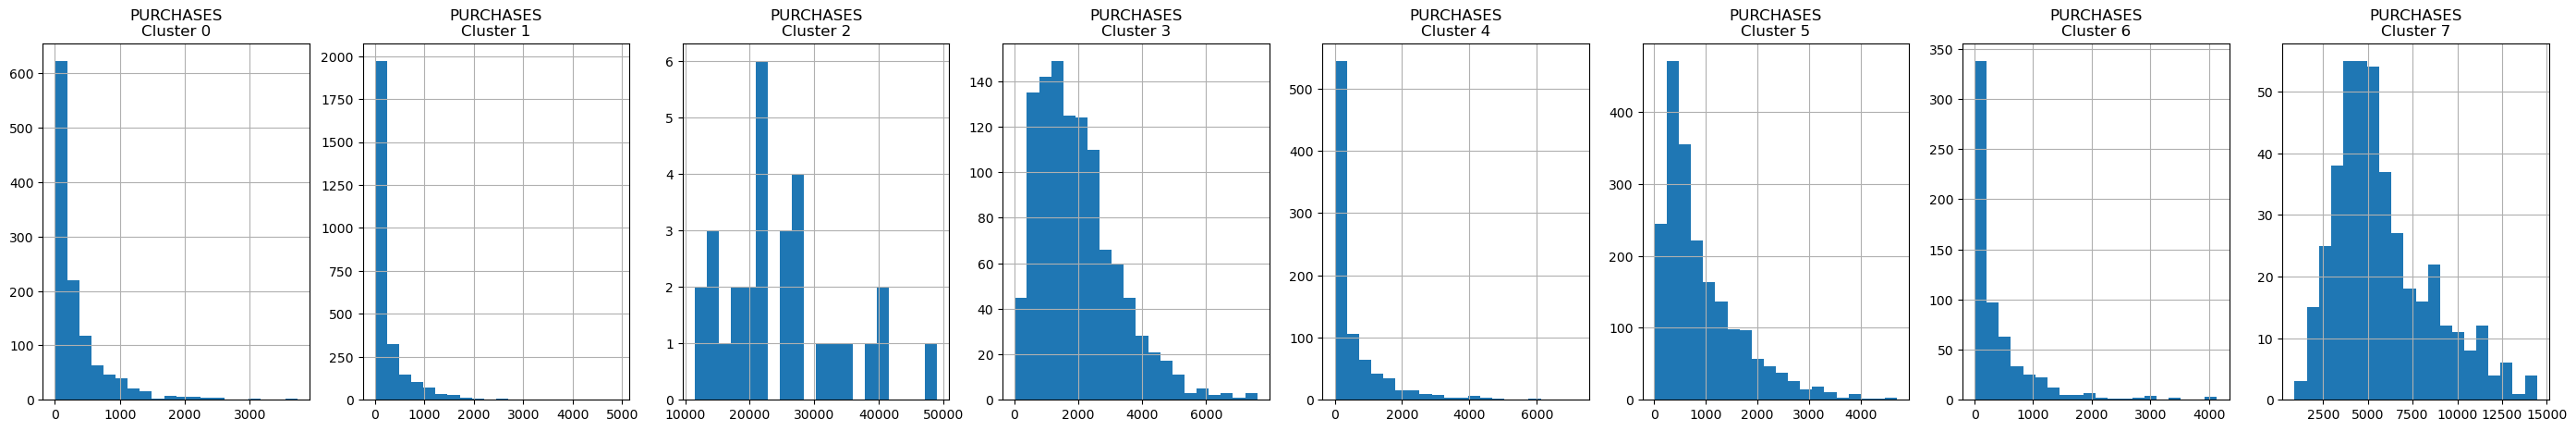

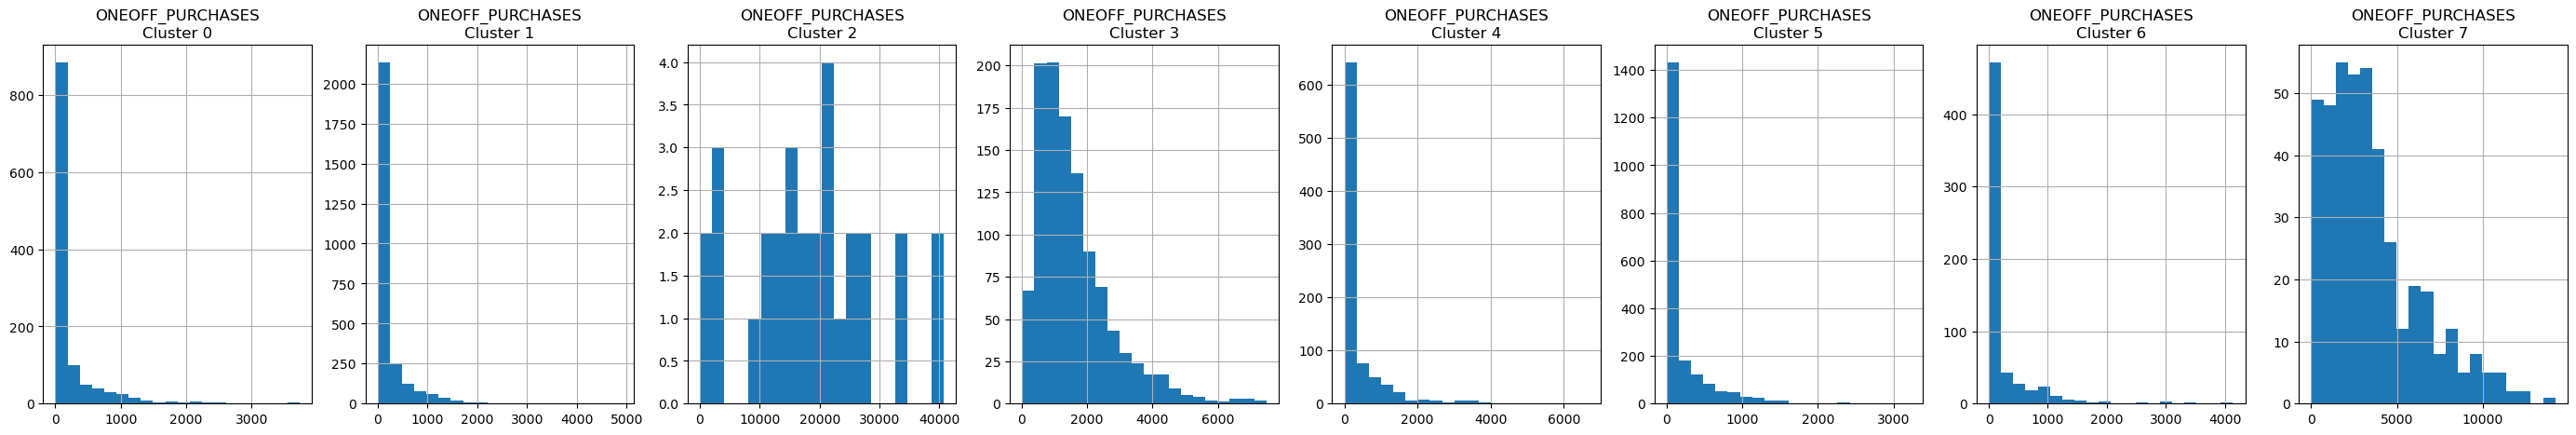

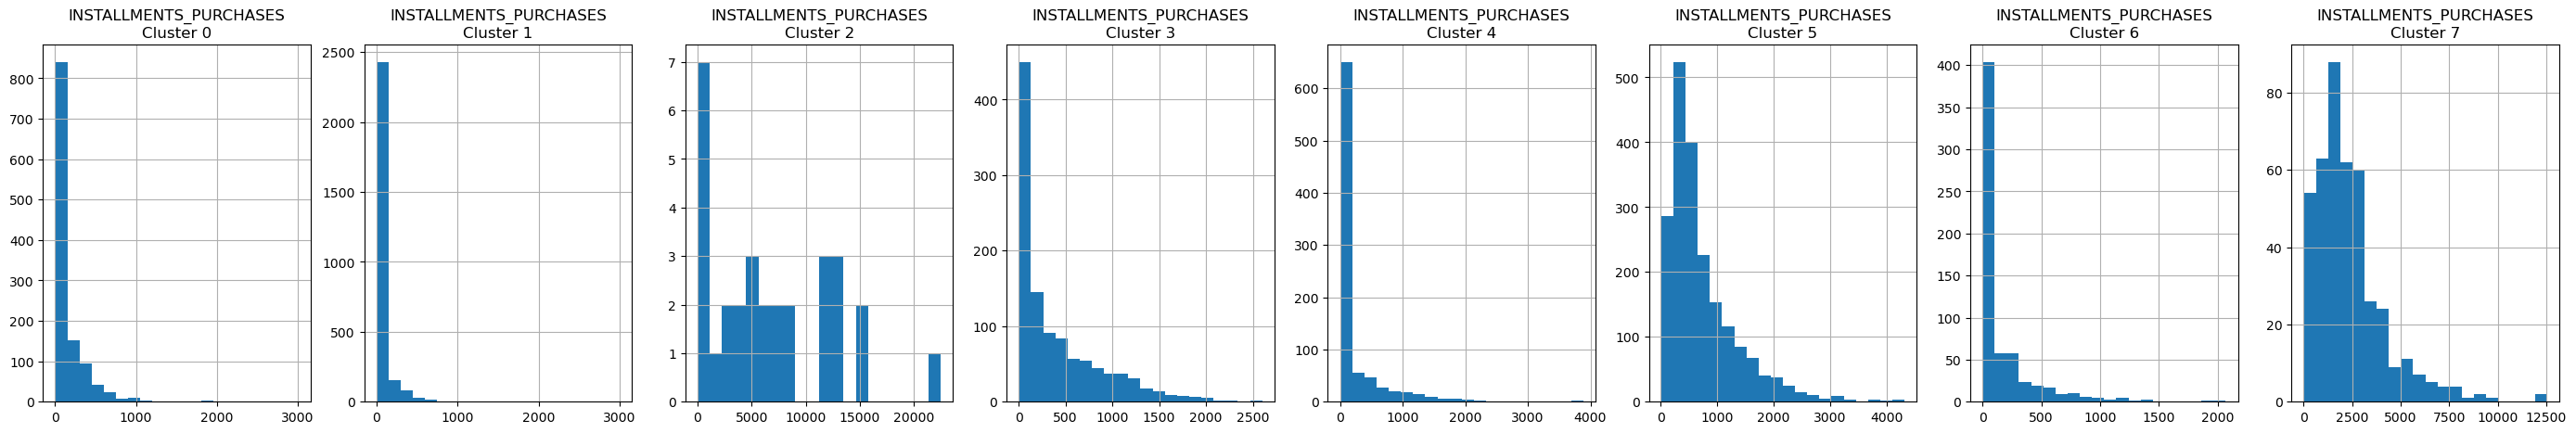

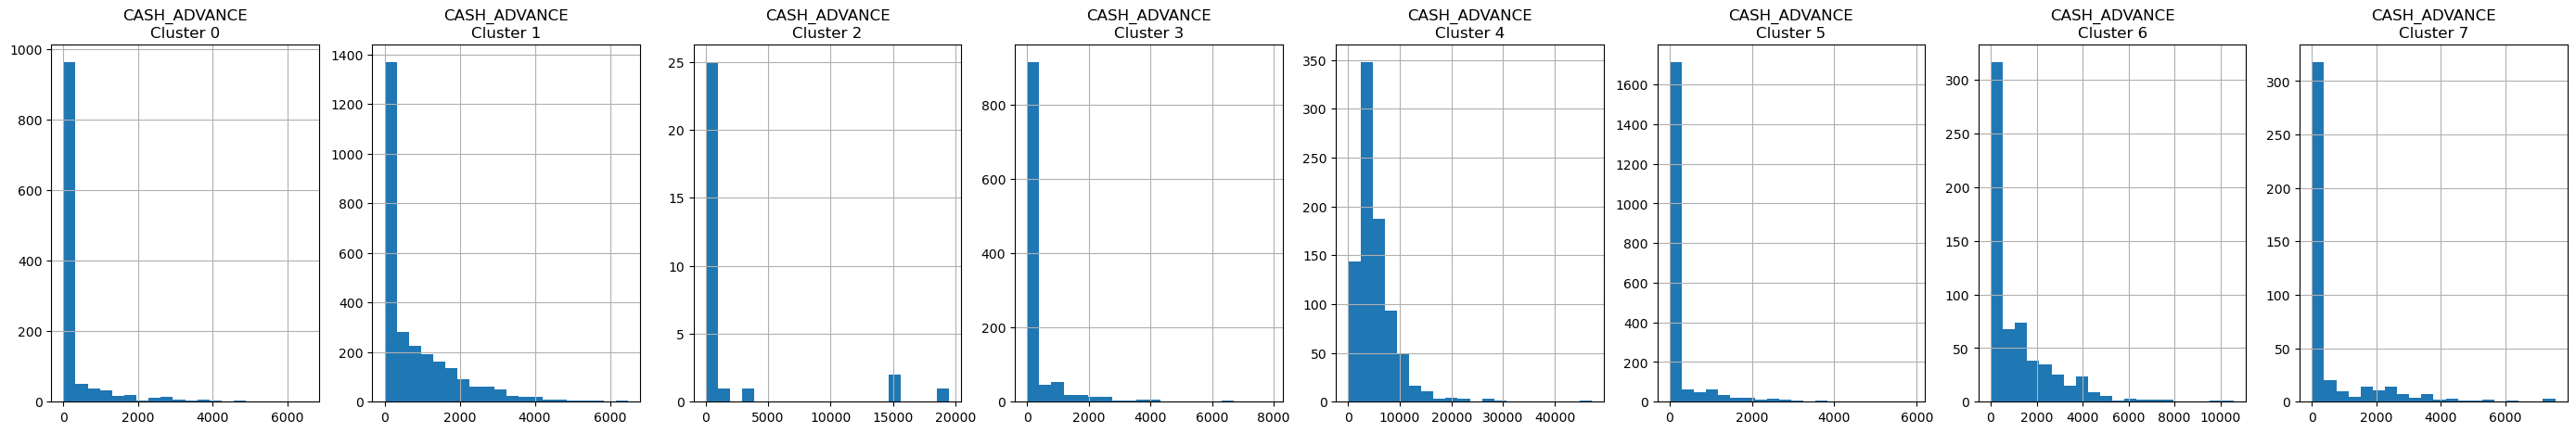

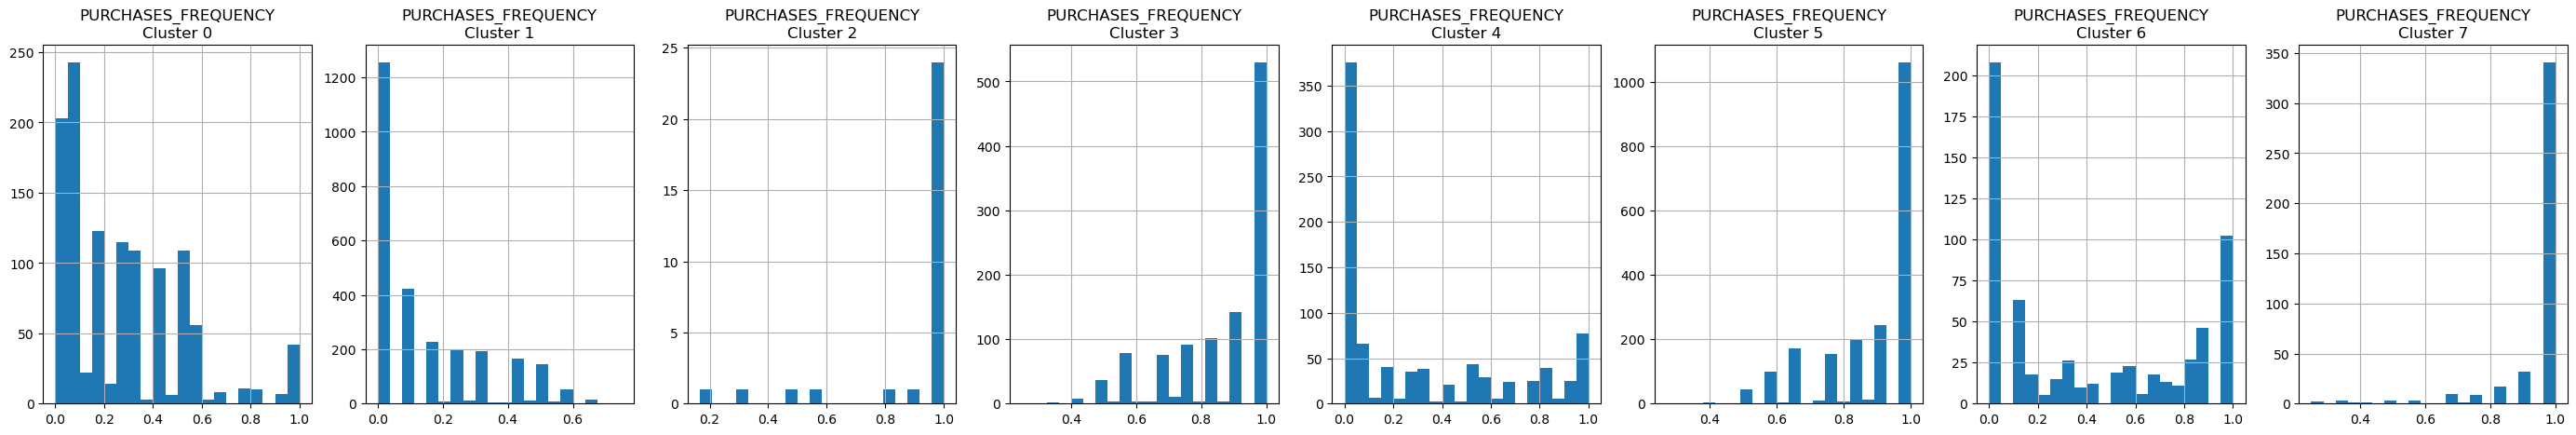

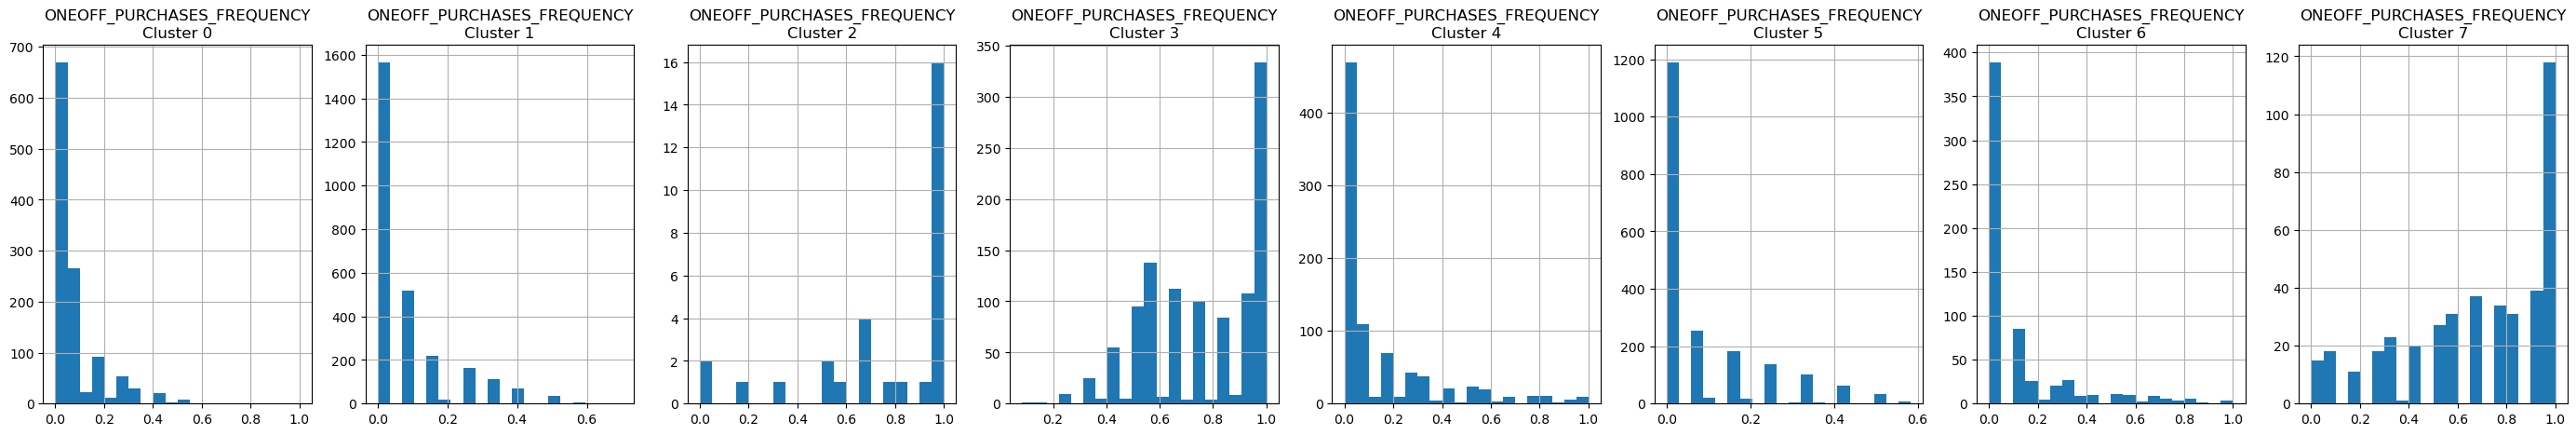

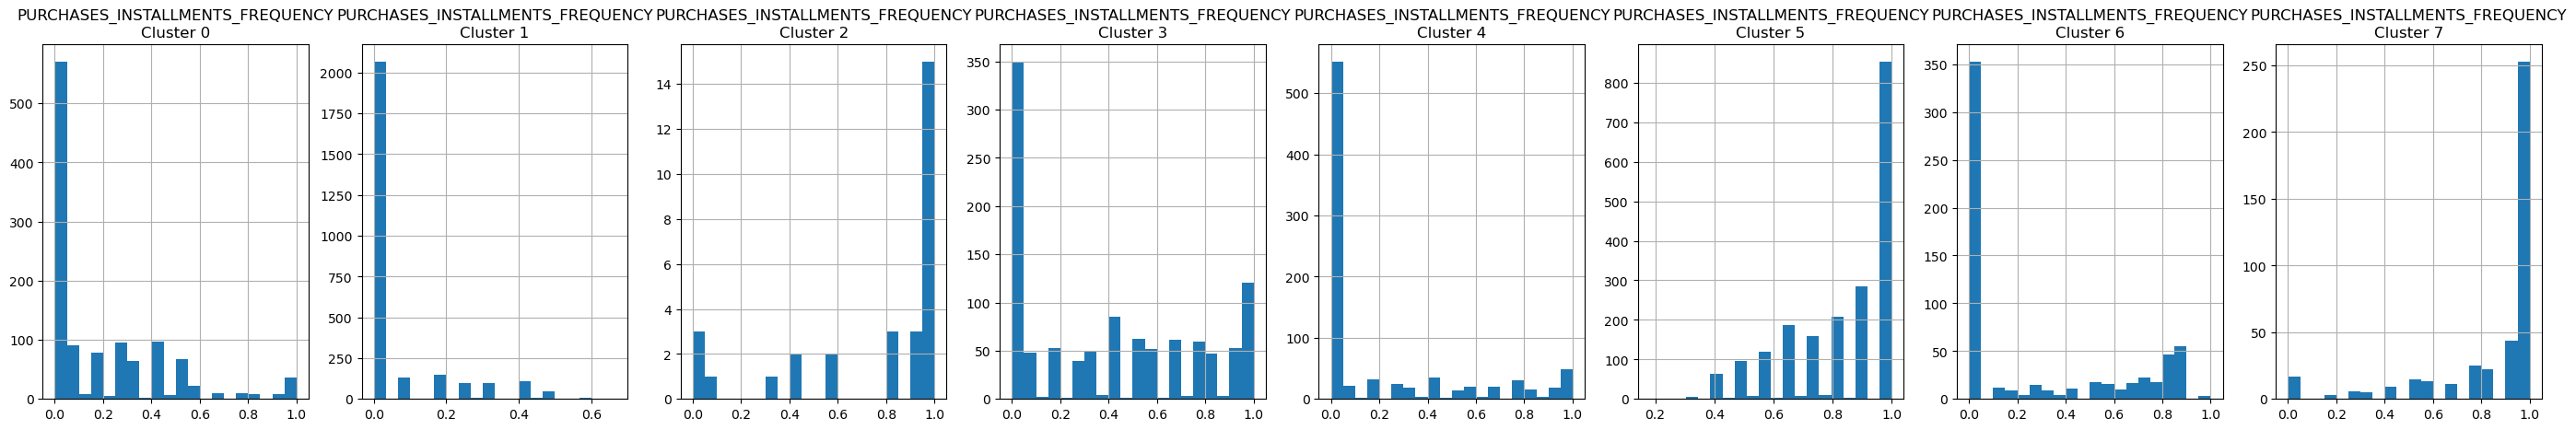

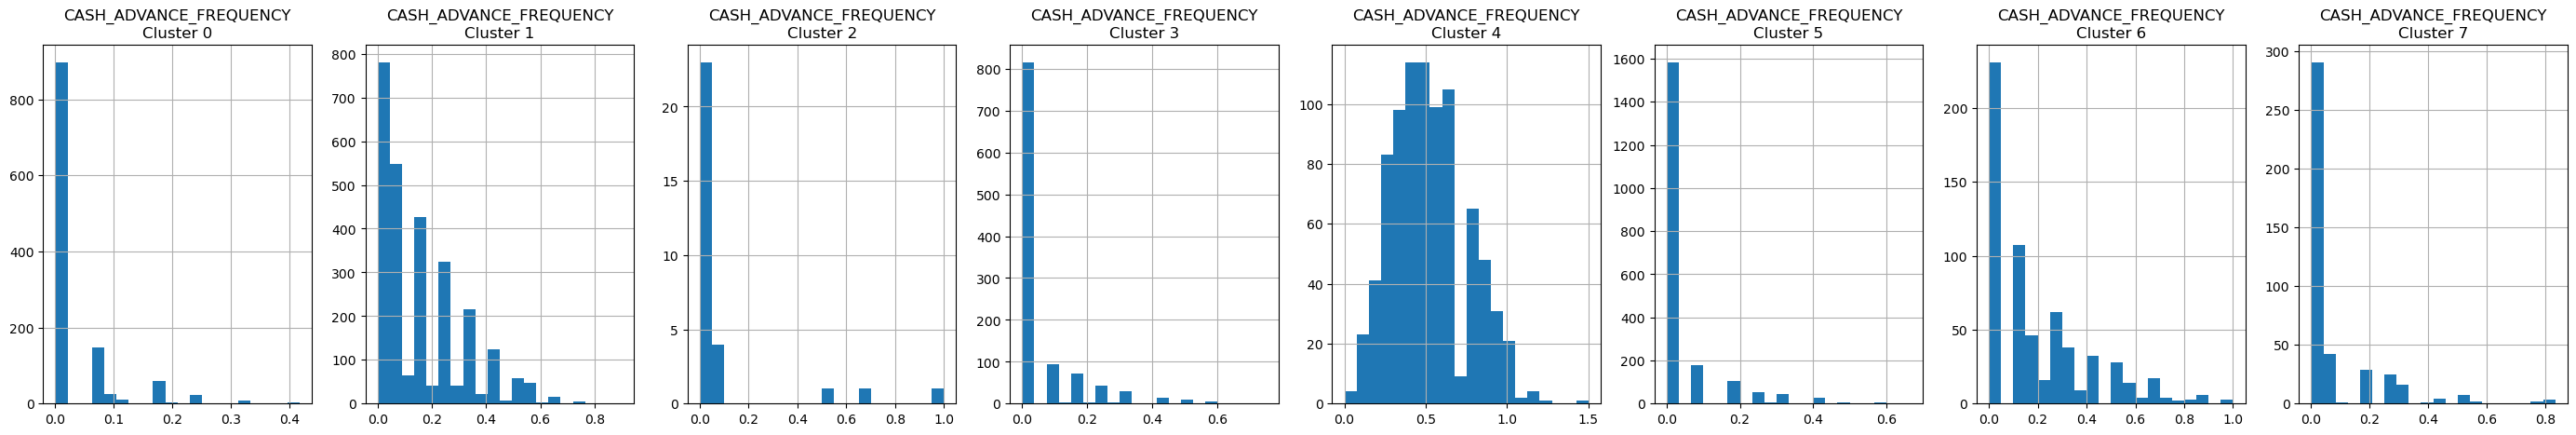

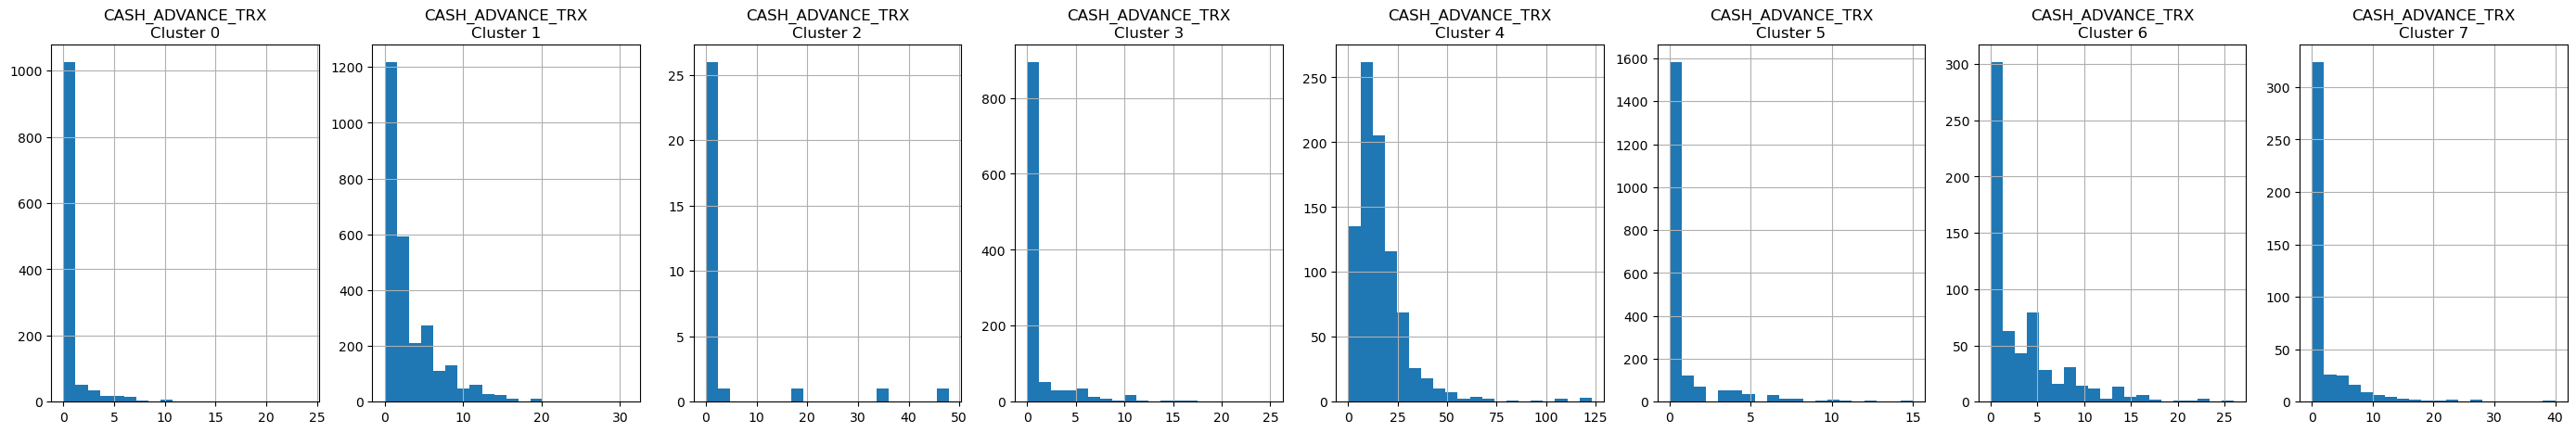

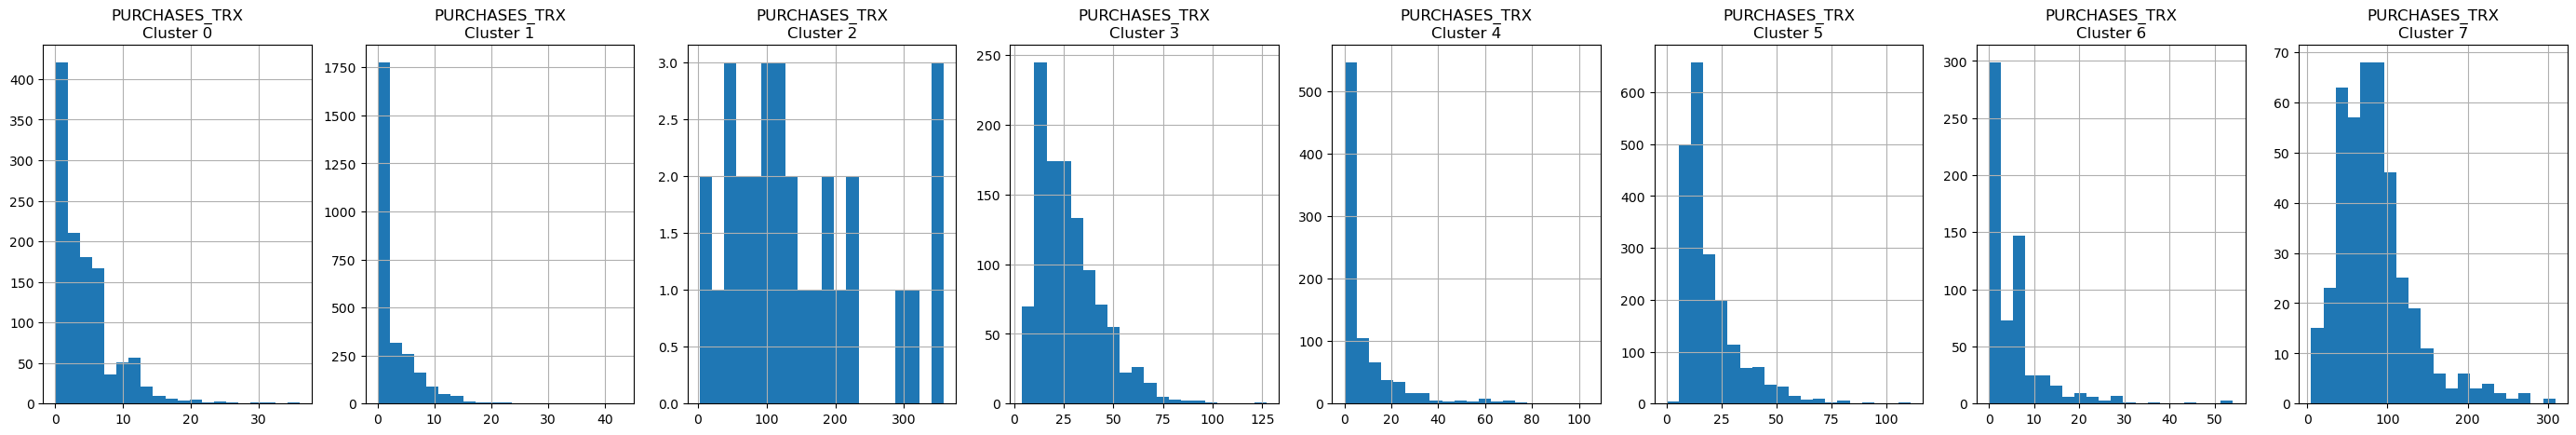

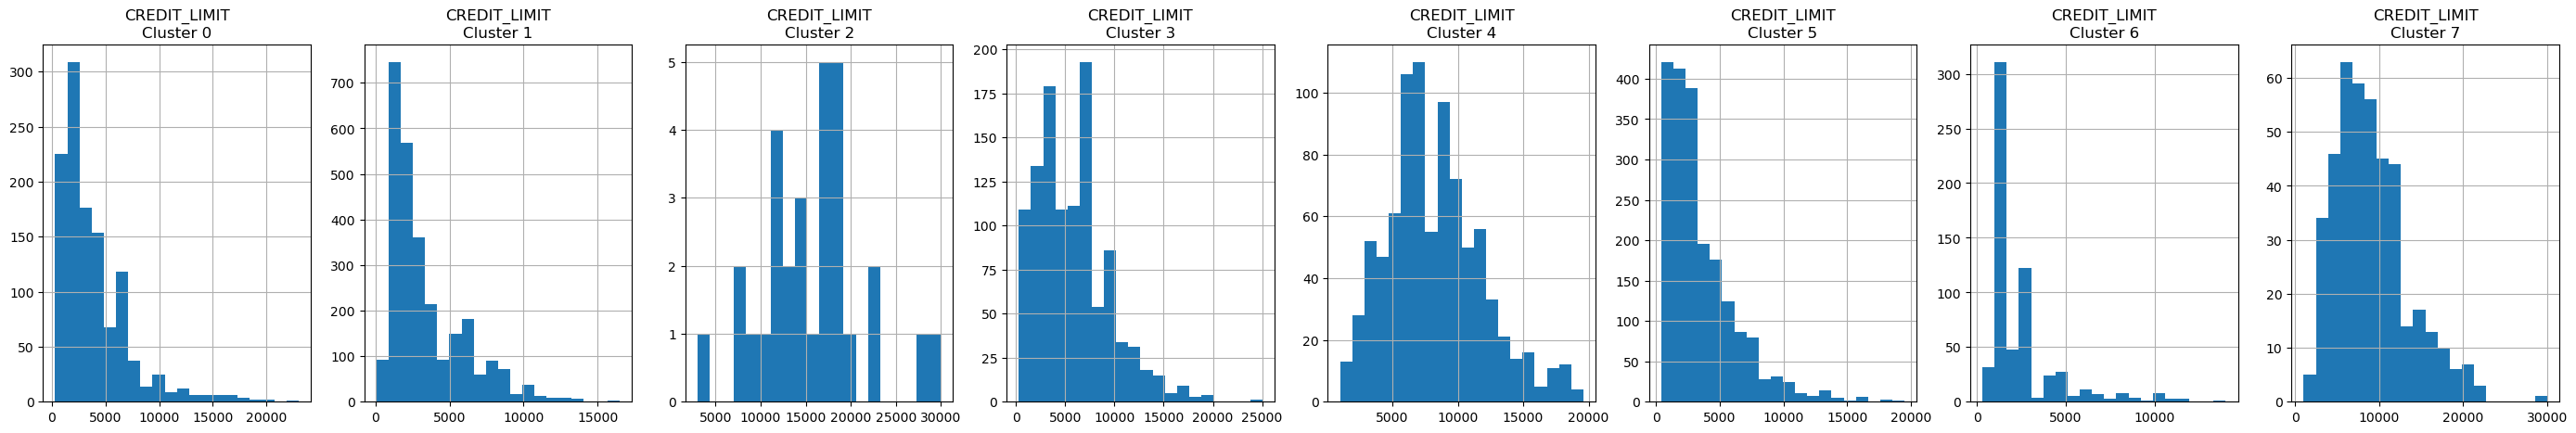

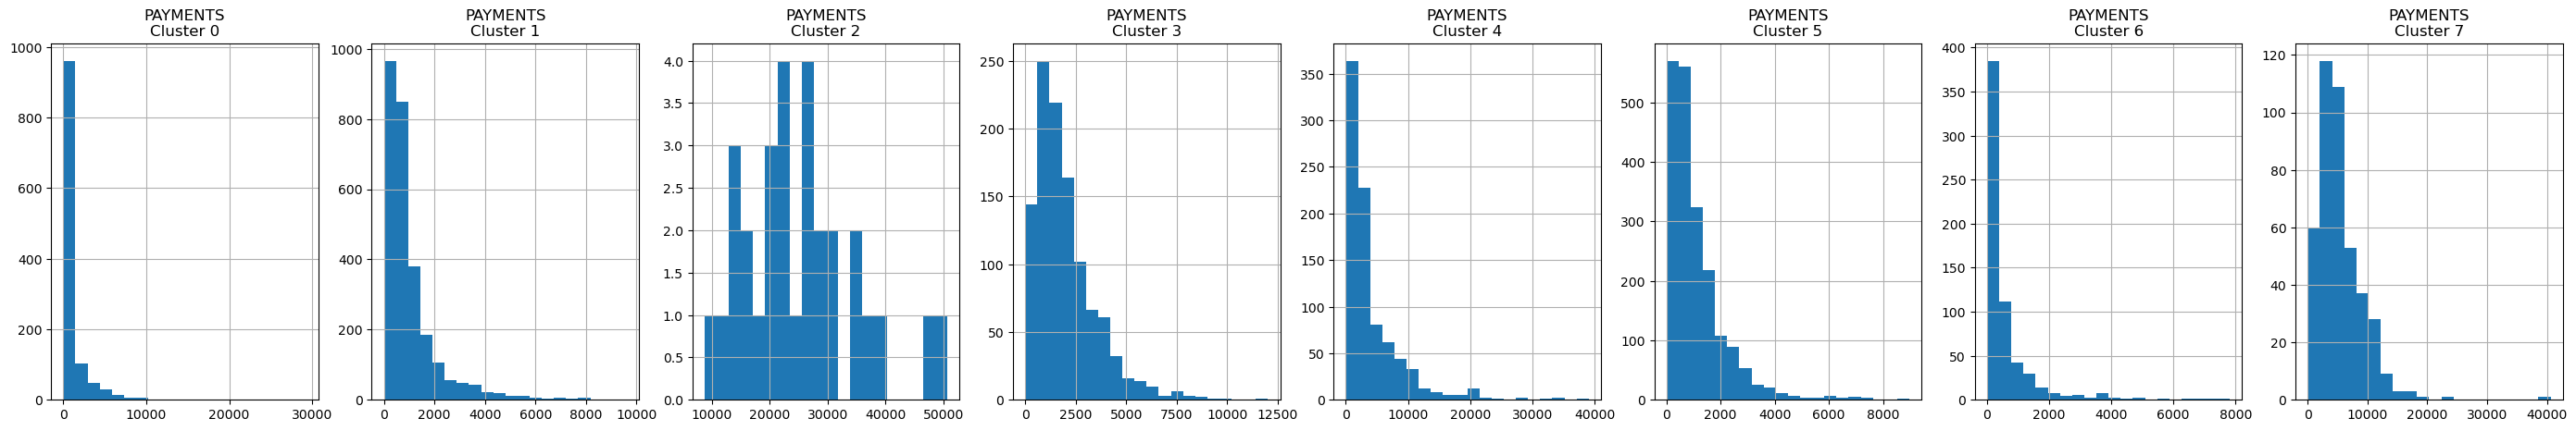

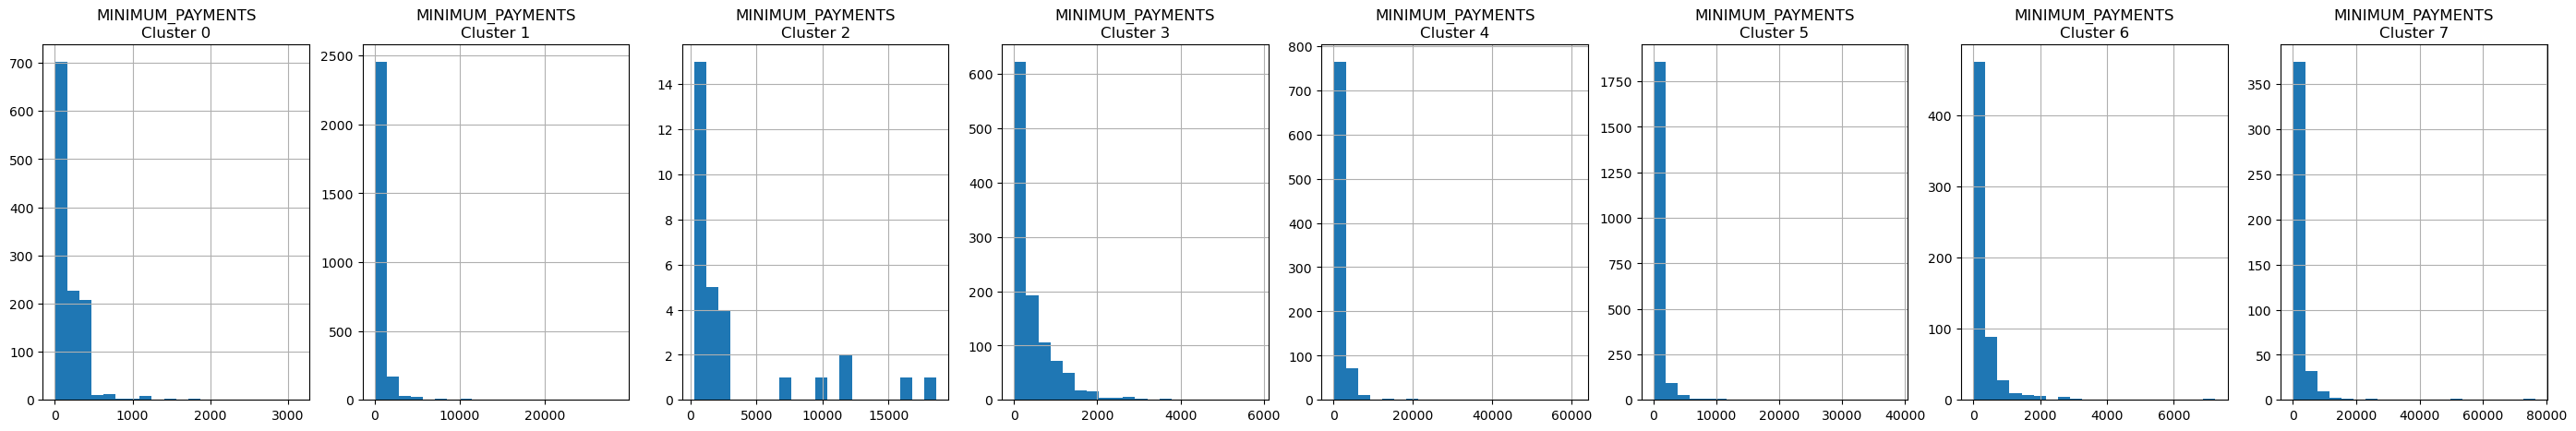

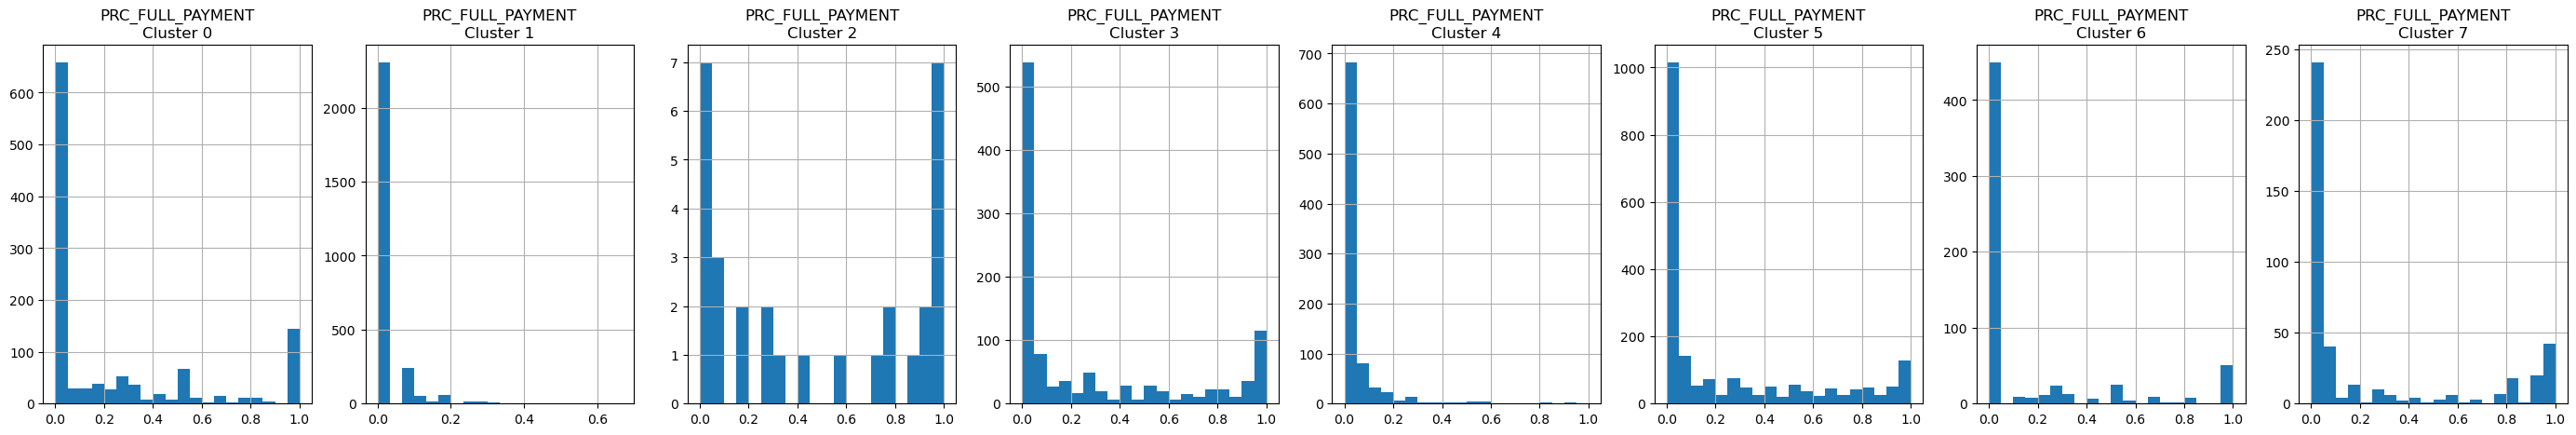

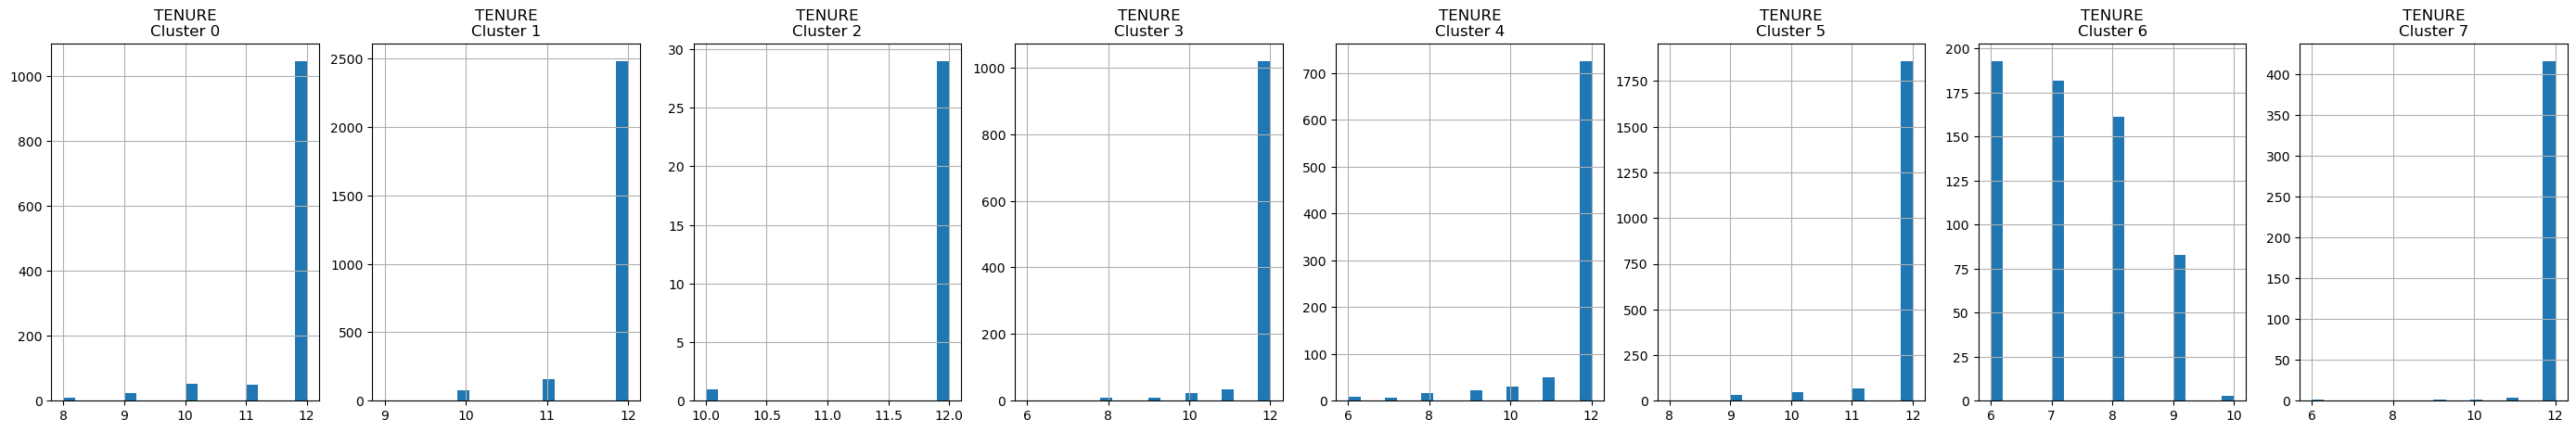

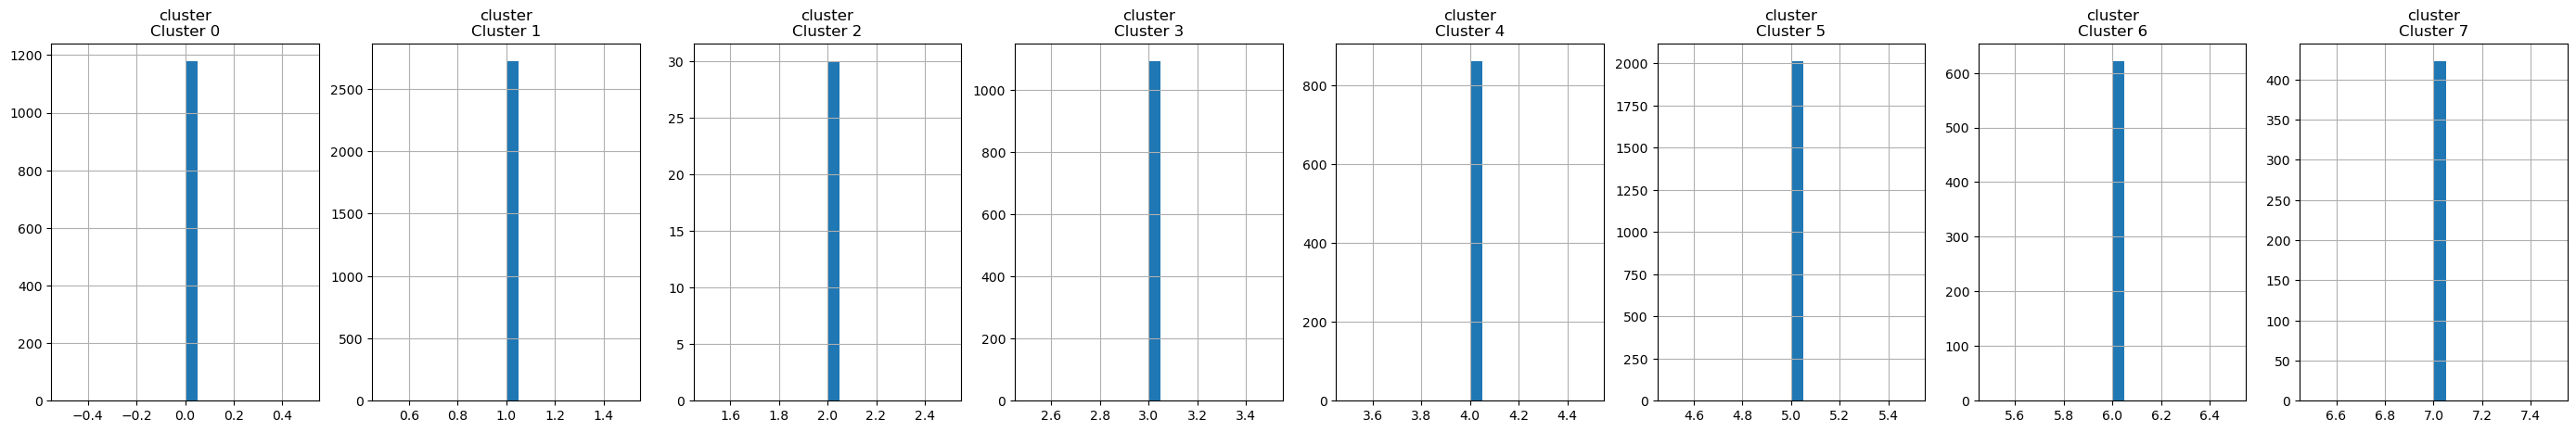

In [32]:
#--each row of figures represents feature distribution for each cluster-----#
for i in creditcard_df_cluster.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[ creditcard_df_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

#### 2.4 Principle component analysis

#### 2.4.1 Compress data to two input variables. This will allow us to view the clusters in two dimensions.

In [33]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68364942, -1.07224346],
       [-1.13408372,  2.50916553],
       [ 0.96938792, -0.38357296],
       ...,
       [-0.92898625, -1.80805913],
       [-2.33784342, -0.65362128],
       [-0.55802546, -0.40063949]])

In [34]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [35]:
pca_df.head()

,pca1,pca2
0,-1.683649,-1.072243
1,-1.134084,2.509166
2,0.969388,-0.383573
3,-0.888219,0.004651
4,-1.600023,-0.683800


#### 2.4.2 Visualize clustering

In [36]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

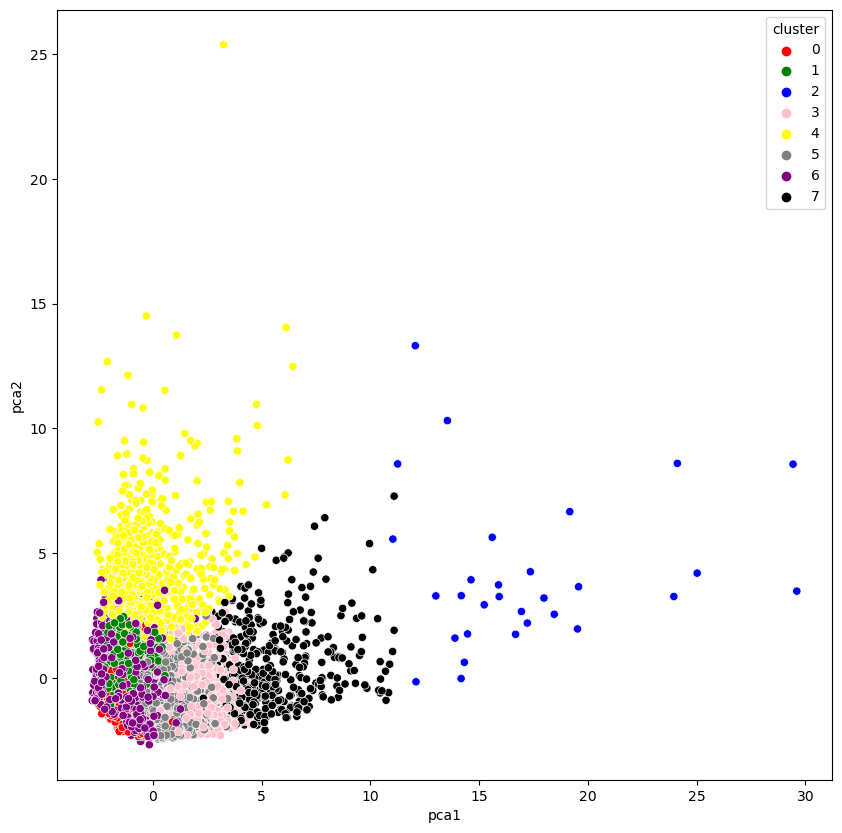

In [37]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Task: Online Retail Customer Clustering

Use the Online Retail.xlsx file, with the following columns:

- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceData
- UnitPrice
- CustomerID
- Country

We will do some RFM (Recency, Frequency, Monetary) analysis here to cluster the users, but first we need to check that the data is good.

## 1. Do an exploratory data analysis, looking for missing values and then either removing those rows or filling them with logical values (you decide which makes more sense in the context), removing any errornoeous values, creating histograms and/or other plots, finding correlations, etc.

In [38]:
df = pd.read_csv('Online Retail.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   InvoiceDay    406829 non-null  datetime64[ns]
 9   InvoiceTime   406829 non-null  object        
 10  InvoiceEpoch  406829 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 37.2+ MB


C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\1189840779.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

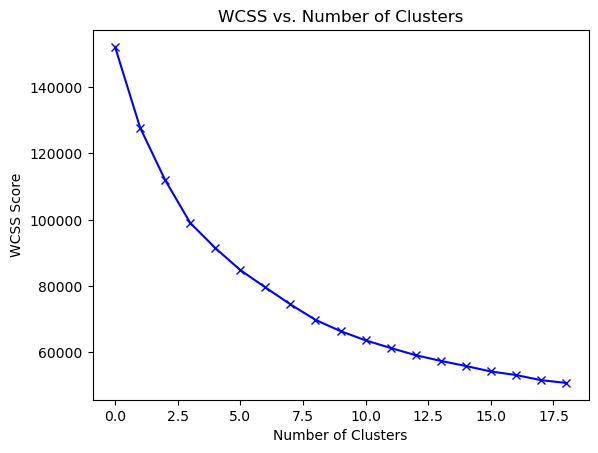

In [56]:
df = df.dropna()

df.info()
df.head()
df.corr()



I would recommend creating a new DataFrame to do the following tasks.

## 2. For each customer (unique CustomerID), determine the number of days since they've last shopped.

Recommendation: Convert all invoice dates to epoch time (read about this!), then for each customer take the largest one. This will take a bit more work than most of the other steps.

In [40]:
import datetime
df[['InvoiceDay','InvoiceTime']] = df.InvoiceDate.str.split(expand=True)
df.InvoiceDay = df.InvoiceDay.str.split("/")
df.InvoiceTime = df.InvoiceTime.str.split(":")
df.InvoiceDay = df.InvoiceDay.apply(lambda x: datetime.datetime(int(x[2]), int(x[0]), int(x[1])))
df.InvoiceTime = df.InvoiceTime.apply(lambda x: datetime.time(int(x[0]), int(x[1])))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDay'].astype(str) + ' ' + df['InvoiceTime'].astype(str))

In [41]:


# given epoch time  
epoch = 33456871 
   
# using the datetime.fromtimestamp() function  
df['InvoiceEpoch'] = (df['InvoiceDate'] - datetime.datetime(1970,1,1)).dt.total_seconds()
df1 = pd.DataFrame(columns=['CustomerID', 'InvoiceDate', 'Orders', 'MoneySpent'])
df1['CustomerID'] = df['CustomerID'].unique()
df3 = df.drop_duplicates(subset='CustomerID')
df3 = df3.reset_index()
df3 = df3.drop('index', axis=1)
df1['InvoiceDate'] = df3['InvoiceEpoch']
df1.head()


,CustomerID,InvoiceDate,Orders,MoneySpent
0,17850.0,1.291192e+09,NaN,NaN
1,13047.0,1.291192e+09,NaN,NaN
2,12583.0,1.291193e+09,NaN,NaN
3,13748.0,1.291194e+09,NaN,NaN
4,15100.0,1.291195e+09,NaN,NaN


## 3. For each customer (unique CustomerID), determine the number of times they've shopped at this retailer.

There is one InvoiceID for each order a customer makes.

In [42]:
customer_counts = df['CustomerID'].value_counts()
df1['Orders'] = customer_counts.values
df1.head()

,CustomerID,InvoiceDate,Orders,MoneySpent
0,17850.0,1.291192e+09,7983,NaN
1,13047.0,1.291192e+09,5903,NaN
2,12583.0,1.291193e+09,5128,NaN
3,13748.0,1.291194e+09,4642,NaN
4,15100.0,1.291195e+09,2782,NaN


## 4. For each customer (unique CustomerID), determine the total amount of money that they've spend at the retailer.

There is one InvoiceID for each order a customer makes.

In [43]:
money_spent = df.groupby(['CustomerID']).UnitPrice.sum()
df1['MoneySpent'] = money_spent.values
df1.head()

,CustomerID,InvoiceDate,Orders,MoneySpent
0,17850.0,1.291192e+09,7983,2.08
1,13047.0,1.291192e+09,5903,481.21
2,12583.0,1.291193e+09,5128,178.71
3,13748.0,1.291194e+09,4642,605.10
4,15100.0,1.291195e+09,2782,65.30


## 5. Combine the information from steps 2-4 into a DataFrame. This will be the basis for our clustering.

In [47]:
df1

,CustomerID,InvoiceDate,Orders,MoneySpent
0,17850.0,1.291192e+09,7983,2.08
1,13047.0,1.291192e+09,5903,481.21
2,12583.0,1.291193e+09,5128,178.71
3,13748.0,1.291194e+09,4642,605.10
4,15100.0,1.291195e+09,2782,65.30
...,...,...,...,...
4367,13436.0,1.323340e+09,1,47.65
4368,15520.0,1.323342e+09,1,39.36
4369,13298.0,1.323350e+09,1,62.68
4370,14569.0,1.323356e+09,1,1220.93


## 6. Scale the columns from step 5 using StandardScalar so that one variable doesn't bias the clustering.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

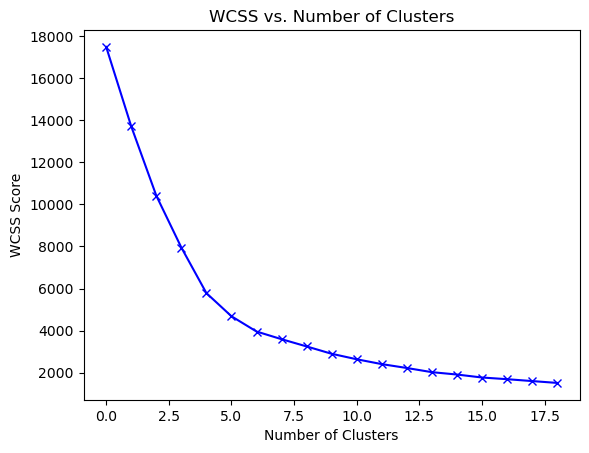

In [58]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1_scaled)
    score_1.append(kmeans.inertia_)

plt.plot(score_1, 'bx-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()



In [67]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(df1_scaled)
labels

array([3, 3, 3, ..., 1, 1, 1])

In [68]:
df1_cluster = pd.concat([df1, pd.DataFrame({'cluster': labels})], axis = 1)


## 7. Use k-means clustering to cluster these shoppers into an appropriate number of bins. Use WCSS as done above to do this. Now create histograms for each cluster. Try to put a label on each cluster (e.g. cluster 1 is people that shop often and spend a lot). Finally, let me know if anything gave you a particularly hard time.

C:\Users\Ksawyer\AppData\Local\Temp\ipykernel_8920\163319921.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])


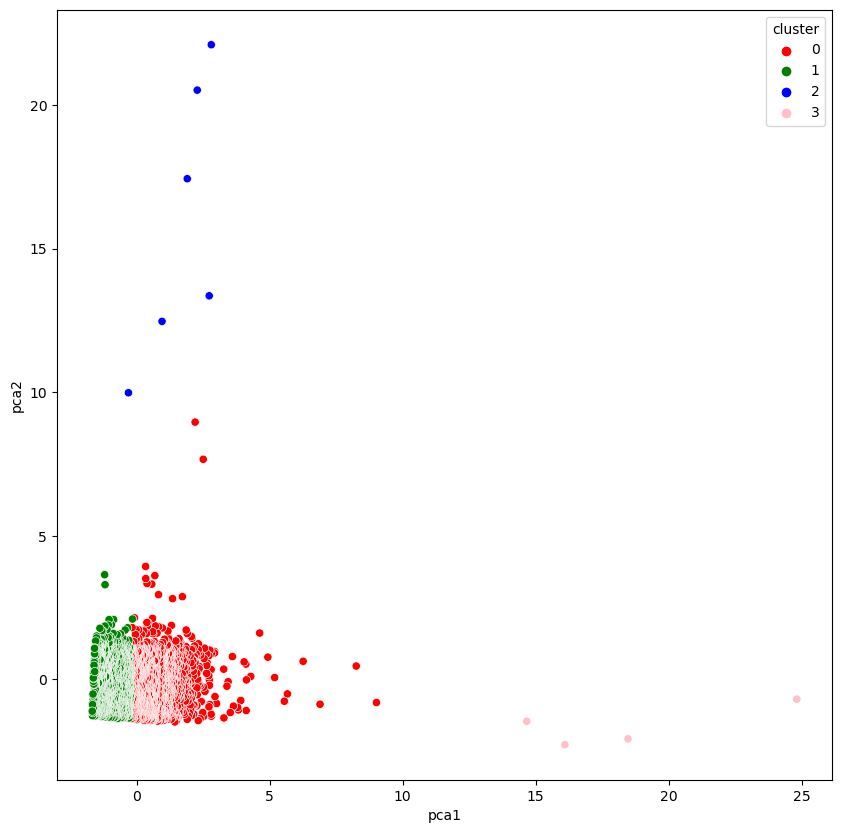

In [69]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df1_scaled)
principal_comp

pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

green: people who dont shop alot
red: people who do shop alot
blue: outliers of green
pink: outliers of red